Step 1: Creating output folder...
Step 2: Loading California Housing Dataset from CSV...

Dataset Preview:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462       

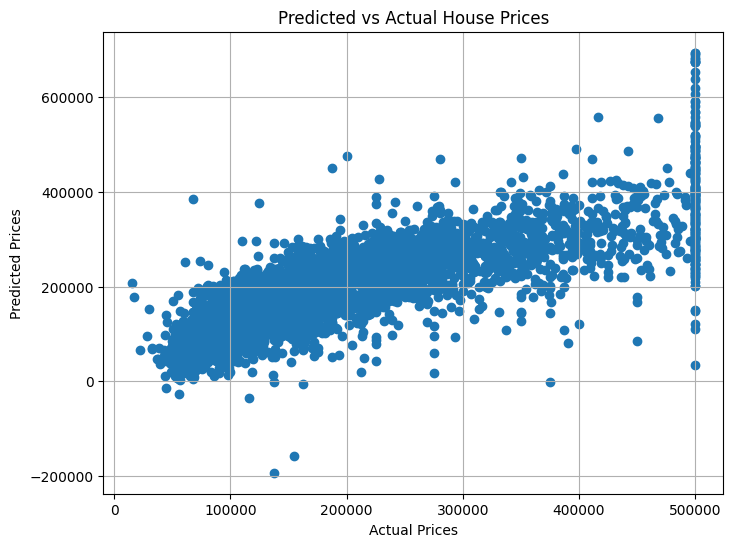


Top Impact Features:
                  Feature   Coefficient
7           median_income  75167.774766
4          total_bedrooms  43068.181842
6              households  18382.196324
2      housing_median_age  13889.866189
9  ocean_proximity_ISLAND   2118.437572

All outputs saved successfully inside 'outputs' folder.


In [9]:
# ==============================
# Linear Regression - House Price Prediction
# FIXED VERSION (No HTTP Error)
# ==============================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

print("Step 1: Creating output folder...")
output_dir = "outputs"
os.makedirs(output_dir, exist_ok=True)

# ==============================
# Step 2: Load Dataset (Direct CSV Source)
# ==============================

print("Step 2: Loading California Housing Dataset from CSV...")

url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

print("\nDataset Preview:")
print(df.head())

# ==============================
# Step 3: Basic Cleaning
# ==============================

# Convert categorical column to numeric
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

# Fill missing values
df.fillna(df.median(), inplace=True)

# ==============================
# Step 4: Feature & Target Separation
# ==============================

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

print("\nTarget Variable Type:", y.dtype)

# ==============================
# Step 5: Train-Test Split
# ==============================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])

# ==============================
# Step 6: Feature Scaling
# ==============================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==============================
# Step 7: Train Model
# ==============================

model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("\nModel Training Completed.")

# ==============================
# Step 8: Predictions
# ==============================

y_pred = model.predict(X_test_scaled)

comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

print("\nSample Predictions:")
print(comparison.head())

comparison.to_csv(f"{output_dir}/predictions.csv", index=False)

# ==============================
# Step 9: Evaluation
# ==============================

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

with open(f"{output_dir}/evaluation_report.txt", "w") as f:
    f.write("Linear Regression - House Price Prediction\n")
    f.write("==========================================\n\n")
    f.write(f"Mean Absolute Error (MAE): {mae}\n")
    f.write(f"Root Mean Squared Error (RMSE): {rmse}\n")
    f.write(f"R2 Score: {r2}\n")

# ==============================
# Step 10: Plot
# ==============================

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.grid(True)
plt.savefig(f"{output_dir}/predicted_vs_actual.png")
plt.show()

# ==============================
# Step 11: Feature Importance
# ==============================

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coefficients.to_csv(f"{output_dir}/feature_importance.csv", index=False)

print("\nTop Impact Features:")
print(coefficients.head())

print("\nAll outputs saved successfully inside 'outputs' folder.")